In [1]:
# Import necessary libraries for visualization, numerical operations, and quantum machine learning
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit import QuantumCircuit
from qiskit_machine_learning.algorithms.classifiers import VQC
from tqdm import tqdm

In [2]:
# Set the random seed for reproducibility
np.random_seed = 42

In [3]:
# Define the number of input features and number of samples
num_inputs = 2
num_samples = 40

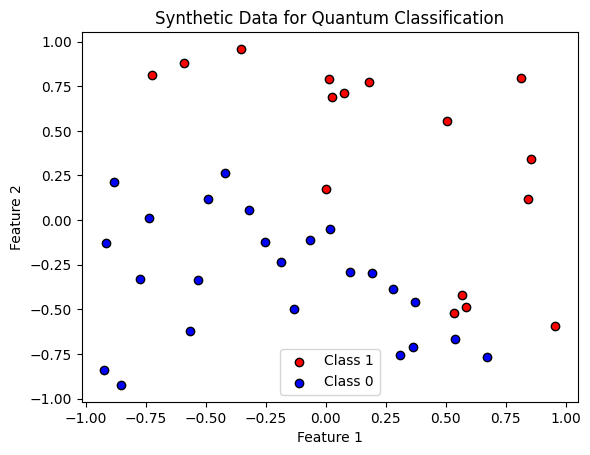

In [4]:
# Generate random samples for training data
X = 2 * np.random.random((num_samples, num_inputs)) - 1

# Calculate the target labels based on the sum of features
y = np.sum(X, axis=1) >= 0  # True if sum is non-negative, False otherwise
y_one_hot = np.zeros((num_samples, 2), dtype=int)
y_one_hot[np.arange(num_samples), y.astype(int)] = 1

# Plotting the generated synthetic data
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', marker='o', edgecolors='k', label="Class 1")
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='b', marker='o', edgecolors='k', label="Class 0")
plt.title("Synthetic Data for Quantum Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [5]:
# Callback function for tracking the optimization process
def epoch_loss_callback(weights, obj_func_eval):
    objective_func_vals.append(obj_func_eval)
    progress_bar.update(1)

In [6]:
# Define the quantum feature map for data encoding
feature_map = ZZFeatureMap(num_inputs, reps=1, entanglement="circular")

# Define the quantum model (ansatz) for the classifier
qc = QuantumCircuit(num_inputs)
qc.append(RealAmplitudes(num_inputs, entanglement="linear", reps=2, parameter_prefix="01"), range(2))
qc.append(RealAmplitudes(num_inputs, entanglement="circular", reps=2, parameter_prefix="02"), range(2))


In [7]:
# Set the number of training epochs
nb_epoch = 120
objective_func_vals = []
progress_bar = tqdm(range(nb_epoch))

# Construct the Variational Quantum Classifier (VQC)
vqc = VQC(
    feature_map=feature_map,
    ansatz=qc,
    loss="cross_entropy",
    optimizer=COBYLA(maxiter=nb_epoch),
    callback=epoch_loss_callback,
)

  0%|          | 0/120 [00:00<?, ?it/s]

In [8]:
# Train the VQC with the synthetic data
vqc.fit(X, y_one_hot)

 99%|█████████▉| 119/120 [00:10<00:00, 12.10it/s]

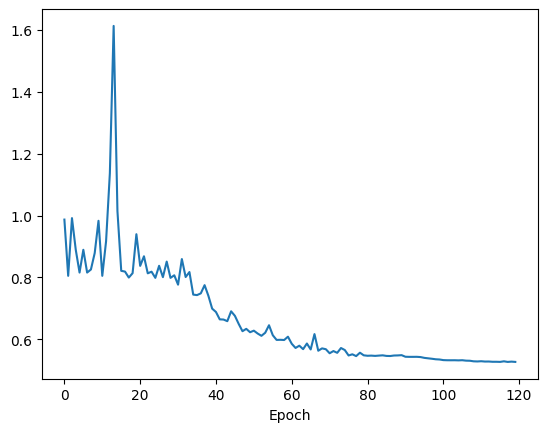

In [9]:
# Plot the objective function values over epochs
plt.plot(range(nb_epoch), objective_func_vals)
plt.xlabel("Epoch")
plt.show()


In [10]:
# Generate new data for testing the model
X = 2 * np.random.random((1000, 2)) - 1
y = np.sum(X, axis=1) >= 0  # Generate labels for the test data

In [11]:
# Predict labels using the trained model and calculate accuracy
y_predict = vqc.predict(X)
y_predict = np.argmax(y_predict, axis=1)
accuracy = np.sum(y_predict == y) / len(y)
print(f"Accuracy: {accuracy * 100}%")


Accuracy: 92.2%
